In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape

(1000, 10)

In [5]:
df=df.drop('Timestamp',axis=1)


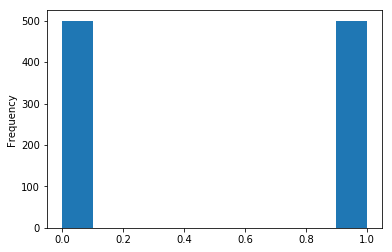

In [6]:
df['Clicked on Ad'].plot.hist()

In [7]:
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [8]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Clicked on Ad               0
dtype: int64

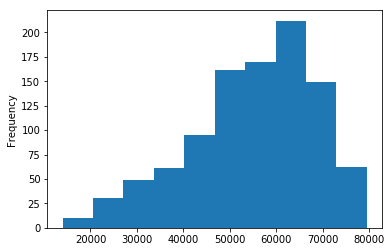

In [9]:
df['Area Income'].plot.hist()

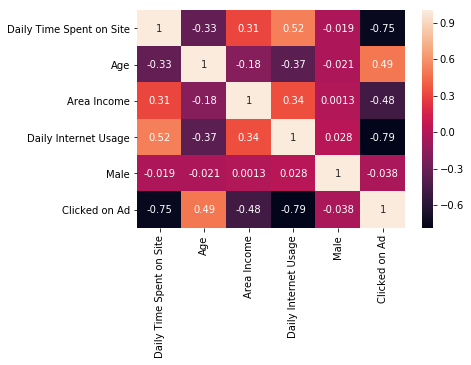

In [10]:
df_corr = df[list(df.dtypes[df.dtypes!='object'].index)].corr()
sns.heatmap(df_corr,annot=True)

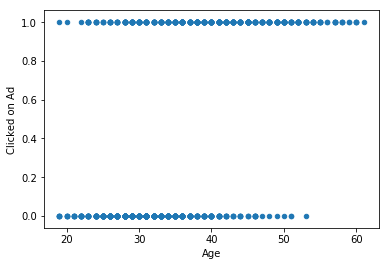

In [11]:
df.plot.scatter('Age','Clicked on Ad')

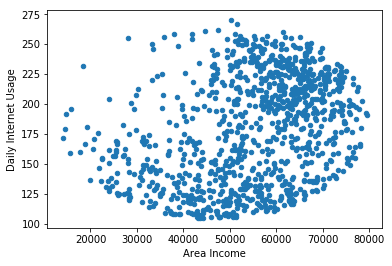

In [12]:
df.plot.scatter('Area Income', 'Daily Internet Usage')

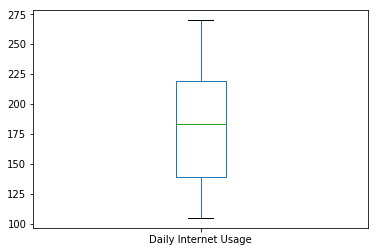

In [13]:
df['Daily Internet Usage'].plot.box()

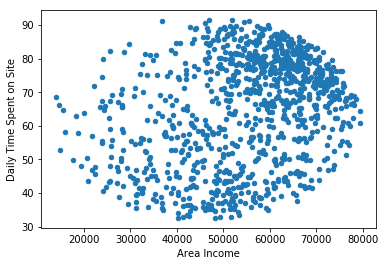

In [14]:
df.plot.scatter('Area Income', 'Daily Time Spent on Site')

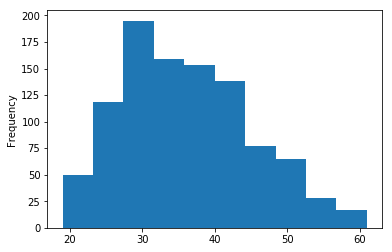

In [15]:
df.groupby('Ad Topic Line')['Age'].mean().plot.hist()

In [26]:
df = pd.get_dummies(df)

In [17]:
x = df.drop('Clicked on Ad',axis=1)

In [18]:
y = df['Clicked on Ad']

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
pred_y = model.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)


0.912

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,pred_y)
cm

array([[127,   9],
       [ 13, 101]], dtype=int64)